# **Cognifyz Technologies – Data Science Internship**

## Level 2 – Analysis Notebook

**Submitted by:** $  Mathews$ $ Henry $

**Dataset:** Restaurants Data

#### **Overview**
This notebook contains the complete analysis for Level 2, which includes:
- Task 1: Table booking & online delivery analysis
- Task 2: Price range analysis
- Task 3: Feature engineering

each task includes insights,visuvalisations, and a final report that matches everything level-2 (task 1-3)

⚠️ note: by the end  of this session this dataset is modifyed as we add new features and also in previous level we did fill missing values here again we will perform and saved in csv file and in next level we will use this modifyed dataset for our modelling tasks level 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset .csv")
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


## **Task 1: Table Booking & Online Delivery Analysis**
here we will perform 3 things :
- Determine the percentage of restaurants that
offer table booking and online delivery.
- Compare the average ratings of restaurants
with table booking and those without.
- Analyze the availability of online delivery
among restaurants with different price ranges.

### 1.**Percentage of Restaurants** Offering Table Booking & Online Delivery


snice they are category columns yes or no its always better to check  are they exactly "Yes" and "No" or is there any extra spaces. or may be they have upper case or lower cases. before analysis in previous notebook we have seen only Cusines column has missing values but all other columns has no missing values. even tho data frame shows but we cant trust object(string) columns  becuase even tho all entries have texts as a result we will see no missing values as all rows are entered  but inbtw these texts may conatin extra spaces or may have upper or lower cases for some text entries.

without noticing this  if we try to map those yes/no cloumns into binary as we need percentages,at end you wont get percentages output will show something like nan%  which means there are white spaces and lower/upper cases present 

so before mapping directly those lets Clean the column before mapping this ensures safe percentages 

In [3]:
# its better to check is there any  values other than yes/no  in these columns
df['Has Table booking'].unique()
df['Has Online delivery'].unique()


array(['No', 'Yes'], dtype=object)

In [4]:
# Clean Yes/No columns (remove spaces, make lowercase)
df['Has Table booking'] = df['Has Table booking'].astype(str).str.strip().str.lower()
df['Has Online delivery'] = df['Has Online delivery'].astype(str).str.strip().str.lower()

# Map to numeric
df['Has Table booking'] = df['Has Table booking'].map({'yes': 1, 'no': 0}) # we have encoded no need to encode again
df['Has Online delivery'] = df['Has Online delivery'].map({'yes': 1, 'no': 0}) # encoded

# Calculate percentages
table_booking_pct = df['Has Table booking'].mean() * 100
online_delivery_pct = df['Has Online delivery'].mean() * 100

print(f"Table booking offered by: {table_booking_pct:.2f}% of restaurants")
print(f"Online delivery offered by: {online_delivery_pct:.2f}% of restaurants")


Table booking offered by: 12.12% of restaurants
Online delivery offered by: 25.66% of restaurants


**insights**

- 12.12% of restaurants provide a table-booking option.This means only about 1 in every 8 restaurants allows customers to reserve a table in advance.
- 25.66% of restaurants offer online delivery.This means roughly 1 out of 4 restaurants supports food delivery services.

**conclusion**

- looks like Table booking is not very common across the restaurants in the dataset.most restaurants appear to operate on a walk-in model.
- Online delivery is more common than table booking, but still not provided by the majority.This could be due to possible reasons:
-  A large portion of restaurants may be in regions where delivery services are less prevalent.
- Some may rely on third-party platforms like (swiggy etc) but are not marked as “Yes” in the dataset.



### **Compare Average Ratings** (With vs Without Table Booking)

In [5]:
rating_comparison = df.groupby('Has Table booking')['Aggregate rating'].mean()

rating_comparison.index = ['No Table Booking', 'Has Table Booking']
rating_comparison


No Table Booking     2.559359
Has Table Booking    3.441969
Name: Aggregate rating, dtype: float64

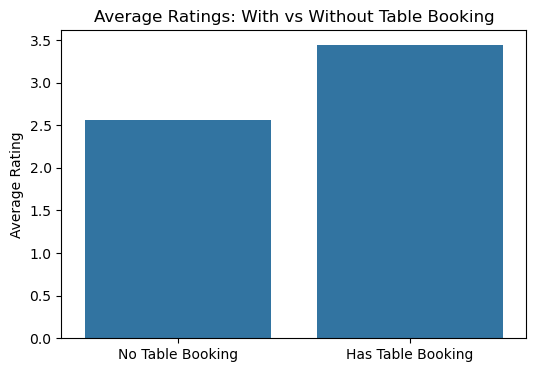

In [6]:
plt.figure(figsize=(6,4))
sns.barplot(x=rating_comparison.index, y=rating_comparison.values)
plt.title("Average Ratings: With vs Without Table Booking")
plt.ylabel("Average Rating")
plt.xlabel("")
plt.show()


**Insights**

Restaurants with table booking have significantly higher average ratings
- Average rating with table booking: 3.45
- Average rating without table booking: 2.55

Restaurants that offer table booking tend to be better rated by customers.
this is becuase  as we know Higher-end restaurants often allow reservations 
These places usually have Organized operations, Better wait-time management, Staff trained for a structured dining experience Customers appreciate this. Which leads to higher ratings.not only that Customer satisfaction tends to be higher
as Booking a table removes: 
Long waiting lines,
Risk of not getting a seat,
Rush-hour frustration, This results in better reviews.

**Conclusion**

Restaurants offering table booking consistently receive higher customer ratings. This suggests that reservation-enabled restaurants tend to provide better service quality, ambience, and overall dining experience.

### **Online Delivery Across Price Ranges**
the goal of this is to answer “Do cheap restaurants offer online delivery more? Or do expensive restaurants offer more?”

in our datasset column Price range: data has been collected of diffrent restuarents and are classifyed them into diffrent price ranges using unique function u can see those price ranges

- 1 - very cheap restuarents
- 2 - Affordable / medium-priced
- 3 - Costly / premium
- 4 - Very expensive

Then for each price range, we calculate: What percentage of restaurants in that price group offer online delivery?

Example: If price range = 2 has 100 restaurants
and 41 of them offer online delivery which means its 41%

In [7]:
df['Price range'].unique()

array([3, 4, 2, 1])

In [8]:
# lets group them 
# cal percentage

delivery_by_price = df.groupby('Price range')['Has Online delivery'].mean() * 100
delivery_by_price


Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64

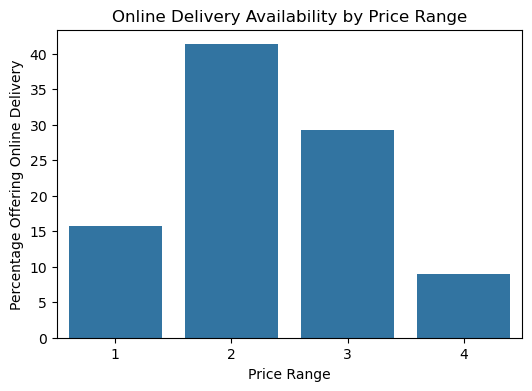

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x=delivery_by_price.index, y=delivery_by_price.values)
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage Offering Online Delivery")
plt.show()


**Insights:**

- Price Range 2 restuarents has the highest online delivery availability (41%)
which means affordable/medium priced restaurants are the MOST active in online delivery.
- Price Range 3 restuarents also shows 29.19% offer online delivery but less than range 2 restuarents.these are costly restuarents still offer delivery but at a lower rate than range 2. this is because 
They likely focus more on  to  premium customers who prefer tabel bookings. even thou some customers prefer online delivery from these  restuarents too so they offer online deliveries.
- Price Range 1 (cheap/budget restaurants) have low delivery availability (15%) this is becuase of main possiblities: Many may not be registered on delivery platforms. and already due to there low profits and if they offer online delivery due to extra  delivery commisions/taxes they avoid to offer online deliverys.
- Price Range 4 (premium restaurants) show the lowest delivery availability (9%) this is becuase High-end restaurants often prioritize tabel bookings these have good
Fine-dining experience,Quality control,
Premium service.
They usually avoid online delivery due to there strong brand positioning.

**conclusion**

Medium-range restaurants dominate online delivery,Premium restaurants avoid it,Budget restaurants may lack infrastructure or profit margins for delivery.
This insight helps understand how pricing influences delivery strategy.


## **TASK 2 — Price Range Analysis**
here we will 
- Determine the most common price range
among all the restaurants.
- Calculate the average rating for each price
range.
- Identify the rating color that represents the highest
average rating among different price ranges.

In [10]:
# ----- 1. Most common price range -----

price_counts = df['Price range'].value_counts()
most_common_price = price_counts.idxmax()

print("Most common price range:", most_common_price)
print(price_counts)


Most common price range: 1
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


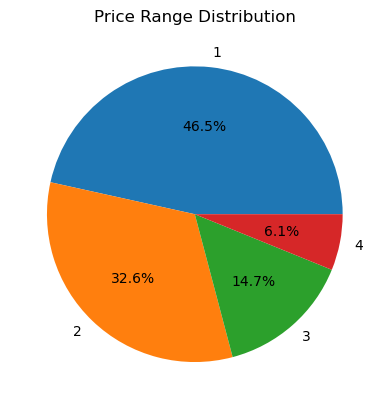

In [11]:
price_counts = df['Price range'].value_counts().sort_index()

plt.pie(price_counts.values, labels=price_counts.index, autopct='%1.1f%%')
plt.title("Price Range Distribution")
plt.show()


**insights**

Most restaurants are in Price Range 1, meaning they are the most affordable.
Price Range 2 is also common.
Only a small number of restaurants fall into Price Ranges 3 and 4, which are the more expensive categories.

In [12]:
# ----- 2. Average rating for each price range -----

avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()

print("\nAverage rating for each price range:")
print(avg_rating_by_price)



Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


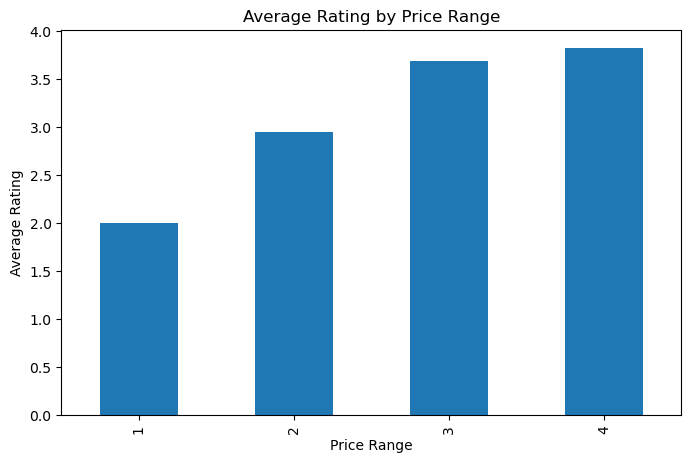

In [13]:
# lets visuvalise in bar chart

plt.figure(figsize=(8,5))
avg_rating_by_price.plot(kind='bar')
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.title("Average Rating by Price Range")
plt.show()




# X-axis → Price ranges (1 to 4)
# Y-axis → Average rating
# Bars → Showing how the rating increases with price

**insights**

- Price Range 1 (cheapest/budget restaurents) - Average rating: 1.99, Customers give lower ratings to the cheapest restaurants.
- Price Range 2(medium priced restuarents)-  Average rating: 2.94 which means Ratings improve as price increases.
- Price Range 3(costly restuarents)- Average rating: 3.68 ,  Higher-priced restaurants receive better ratings.
- Price Range 4 (most expensive) - Average rating: 3.82, These restaurants have the highest average ratings.

**conclusion**

As the price range increases, the average rating also increases.
This means expensive restaurants are generally rated higher by customers suggesting they offer better service/quality.

In [14]:
# ----- 3. Dominant rating color in highest-rated price range -----

# Find which price group has the highest avg rating
best_price_range = avg_rating_by_price.idxmax()

# Filter only restaurants in that price range
subset = df[df['Price range'] == best_price_range]

# Identify the most common rating color
dominant_color = subset['Rating color'].value_counts().idxmax()

print(f"\nPrice range with highest average rating: {best_price_range}")
print("Most common rating color in this group:", dominant_color)



Price range with highest average rating: 4
Most common rating color in this group: Yellow


##### **Bar Chart: Dominant Rating Color in Highest-Rated Price Range**

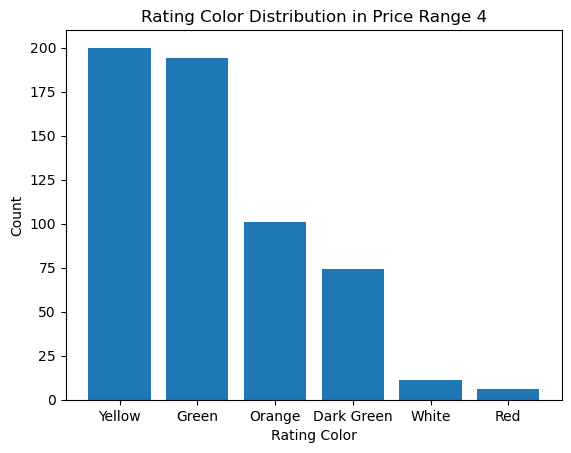

In [15]:
# Filter only restaurants in the highest-rated price range

subset = df[df['Price range'] == best_price_range]

# Count rating colors in this price range
color_counts = subset['Rating color'].value_counts()

# Plot
plt.bar(color_counts.index, color_counts.values)
plt.xlabel("Rating Color")
plt.ylabel("Count")
plt.title(f"Rating Color Distribution in Price Range {best_price_range}")
plt.show()


# X-axis → Rating colors
# Y-axis → Number of restaurants in that color category
# The tallest bar shows the dominant rating color

##### ***note*** : Restaurants in this dataset are assigned a color label based on their aggregate rating range this is called **Rating colour**

this rating colour represents kind of rating i.e good , avg, poor etc, these are  mentioned in  column : **rating text**

#### $ Example: $

**Rating Color**  -  **Rating Range** - **rating text**
 
**Dark Green** -  **4.5 – 5.0**       - **Excellent**  



In [16]:
# lest find out rating range of yellow colour look at min and max - thats the rating  range

df.groupby('Rating color')['Aggregate rating'].describe()


,count,mean,std,min,25%,50%,75%,max
Rating color,,,,,,,,
Dark Green,301.0,4.659801,0.150373,4.5,4.5,4.6,4.8,4.9
Green,1079.0,4.168119,0.135469,4.0,4.1,4.1,4.3,4.4
Orange,3737.0,3.051619,0.251459,2.5,2.9,3.1,3.3,3.4
Red,186.0,2.297849,0.126045,1.8,2.2,2.3,2.4,2.4
White,2148.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Yellow,2100.0,3.683429,0.139083,3.5,3.6,3.7,3.8,3.9


In [17]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [18]:
# lets Find the Rating Text for “Yellow” Color
df[df['Rating color'] == 'Yellow']['Rating text'].unique()


array(['Good'], dtype=object)

So in our dataset, the Yellow color corresponds to:
- Rating Range: 3.5 – 3.9
- Rating Text: Good

**insights**

- Highest-rated price range = 4
- Most common rating color in price range 4 = Yellow

which means among expensive restaurants (price range 4),
the most common rating category is “Yellow”, which represents good  ratings (3.5 - 3.9).
This shows that many restaurants in this range maintain a consistent and reliable quality, receiving generally positive feedback from customers.

## **TASK 3** - **Feature Engineering 🔥**
here we will perform 
- Extract additional features from the existing
columns, such as the length of the restaurant
name or address.
- encode features
- drop irelevant features that dont contribute to models

In [19]:
# new Feature: Length of Restaurant Name
df['name_length'] = df['Restaurant Name'].str.len()


In [20]:
# new Feature: Length of Address
df['address_length'] = df['Address'].str.len()


In [21]:
# Replace missing cuisines with a placeholder
df['Cuisines'] = df['Cuisines'].fillna('Unknown')


# This approach keeps the dataset complete without losing information.

In [22]:
from sklearn.preprocessing import LabelEncoder
# label encoding
label_cols = ['City', 'Locality', 'Cuisines']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [23]:
cols_to_drop = [
    'Restaurant ID',
    'Restaurant Name',
    'Address',
    'Locality Verbose',
    'Is delivering now',
    'Switch to order menu',
    'Currency',
    'Rating color',           # LEAKAGE
    'Rating text'             # LEAKAGE
]

df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')



Some columns were removed  because they do not contribute useful information to the prediction task. These include:

Columns with Text data Only such as Restaurant Name, Address, Locality Verbose contain long text descriptions that do not directly help in predicting numerical ratings. Instead of keeping the full text, I extracted meaningful features like name_length and address_length, which provide numerical information without increasing complexity.

the Column “Switch to order menu”
I removed this column because it does not help in predicting the rating or cost of the restaurant.
It only shows whether the app redirects the user to another ordering page.
This behaviour is controlled by the platform, not the restaurant, so it does not give any useful information for our machine-learning model.
So, keeping it would only add noise and make the model less accurate.

  Irrelevant Columns like Restaurant ID and Country Code act more like identifiers rather than factors that influence restaurant ratings. Since they do not add predictive value, they were removed.

Redundant Categorical Columns such as Rating text and Rating color describe the same information already captured in Aggregate rating, which is the numerical target variable. Keeping them may cause leakage, so they were dropped.

“Is delivering now” only tells whether the restaurant was delivering at that exact moment the data was collected.
This changes all the time.
 It does NOT affect rating so It is not useful for prediction.
So this column does not help our model learn anything, and that’s why i removed it.






In [24]:
dtype_table = pd.DataFrame(df.dtypes, columns=["Data Type"])
dtype_table


,Data Type
Country Code,int64
City,int64
Locality,int64
Longitude,float64
Latitude,float64
Cuisines,int64
Average Cost for two,int64
Has Table booking,int64
Has Online delivery,int64
Price range,int64


In [25]:
# -------------------------------------------------
# 6. Save final Level 3 dataset
# -------------------------------------------------
df.to_csv("final_level3_dataset.csv", index=False)

df.head()


,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,name_length,address_length
0,162,73,171,121.027535,14.565443,920,1100,1,0,3,4.8,314,16,71
1,162,73,593,121.014101,14.553708,1111,1200,1,0,3,4.5,591,16,67
2,162,75,308,121.056831,14.581404,1671,4000,1,0,4,4.4,270,22,56
3,162,75,862,121.056475,14.585318,1126,1500,0,0,4,4.9,365,4,70
4,162,75,862,121.057508,14.584450,1122,1500,1,0,4,4.8,229,11,64


# $ Level$ $ 2$ – $ Final $  $ Report $

##### ***Task 1: Table Booking & Online Delivery Analysis***

**Findings**
- 12.12% of restaurants offer table booking, while 87.88% do not.
- 25.66% of restaurants offer online delivery, showing moderate adoption.
- Restaurants with table booking have a higher average rating (≈3.44) compared to those without booking (≈2.56).
- Online delivery availability is highest in mid-priced restaurants (Price Range = 2) with approx 41% offering delivery.
- Delivery availability drops significantly in premium (Range 4) and low-budget (Range 1) categories.

**Insights**

- Restaurants that offer table booking tend to have better ratings than those that don't. meaning customers are more satisfyed due the convenience of reserving a table.
- Online delivery is most common among mid-priced restaurants, suggesting these places focus more on convenience.
- premium and very low-priced restaurants are less likely to provide online delivery.
- Overall, providing table booking or online delivery services can improve customer experience, which may lead to slightly higher ratings.

##### ***Task 2: Price Range & Rating Analysis***
**findings**
-  Most Common is Price Range 1, indicating that most restaurants are budget-friendly in our dataset
-  Average Rating for Each Price Range :
1. Price Range 1 (cheapest/budget restaurents) - Average rating: 1.99, Customers give lower ratings to the cheapest restaurants.
2. Price Range 2(medium priced restuarents)- Average rating: 2.94 which means Ratings improve as price increases.
3. Price Range 3(costly restuarents)- Average rating: 3.68 , Higher-priced restaurants receive better ratings.
4. Price Range 4 (most expensive) - Average rating: 3.82, These restaurants have the highest average ratings.
- Dominant Rating Color in the Highest-Rated Price Range is yellow which represents good ratings(3.5 - 3.9) 

**Insight:**

- Ratings increase with price, suggesting higher-priced restaurants deliver better service/quality.

##### ***Task 3: Feature Engineering***
here New Features Created plus some features encoded using mapping and label encoding and some features dropped.

- name_length - Length of the restaurant’s name.
- address_length- Character length of the restaurant’s full address.
- encoded method used is mapp() for these features :
- has table booking (encoded: Yes → 1, No → 0)
- has online delivery (encoded: Yes → 1, No → 0)
- label encoded features :
- 'City', 'Locality', 'Cuisines'
- dropped features : 'Restaurant ID',
    'Restaurant Name',
    'Address',
    'Locality Verbose',
    'Is delivering now',
    'Switch to order menu',
    'Currency',
    'Rating color',          
    'Rating text'
  
  

**Insight**

These engineered features make the dataset more structured, numeric, and ready for machine learning, improving the quality of Level 3 tasks such as predictive modelling using descion regression trees , random forest regressor.💀